In [2]:
import pandas as pd
pd.options.display.max_columns=500
pd.options.display.max_colwidth=1000
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
import seaborn as sns
from copy import deepcopy

In [3]:
def get_dataset_to_respath(print_flag=False):
    # remote path 
    dataset_to_respath = {'hypernymsuite-BLESS': 'log/bert-large-uncased/hypernymsuite/BLESS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv', 'lm_diagnostic_extended-singular': 'log/bert-large-uncased/lm_diagnostic_extended/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.LM_DIAGNOSTIC_EXTENDED.csv', 'clsb-singular': 'log/bert-large-uncased/clsb/singular/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.CLSB.csv', 'hypernymsuite-LEDS': 'log/bert-large-uncased/hypernymsuite/LEDS/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv', 'hypernymsuite-EVAL': 'log/bert-large-uncased/hypernymsuite/EVAL/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv', 'hypernymsuite-SHWARTZ': 'log/bert-large-uncased/hypernymsuite/SHWARTZ/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv'}

    source_dir = 'spartan:~/cogsci/DAP/'
    target_dir = '../'
    dataset_to_localpath = defaultdict()
    dataset_rename = {
        'hypernymsuite-BLESS': 'BLESS', 'lm_diagnostic_extended-singular': 'LMDIAG', 'clsb-singular':'CLSB', 'hypernymsuite-LEDS': 'LEDS', 'hypernymsuite-EVAL': 'EVAL', 'hypernymsuite-SHWARTZ': 
        "SHWARTZ"
    }
    for dataset, path in dataset_to_respath.items():
        path = path.replace(".tsv", ".csv")
        source_path = source_dir + path 
        dataset_l1 = dataset.split("-")[0]
        dataset_l2 = dataset.split("-")[1] 
        target_path = target_dir + path
        scp_string = f"!scp {source_path} {target_path}"
        if print_flag:
            print(scp_string)
            print()
#         print(target_path)
        dataset_to_localpath[dataset_rename[dataset]] = target_path 
#     print(dataset_to_localpath)
    return dataset_to_localpath
dataset_to_localpath = get_dataset_to_respath()

In [5]:
dataset_to_df = defaultdict()
for dataset, path in dataset_to_localpath.items(): 
    dataset_to_df[dataset] = pd.read_csv(path)
    

['bird'] 132


<AxesSubplot:title={'center':"['bird']"}>

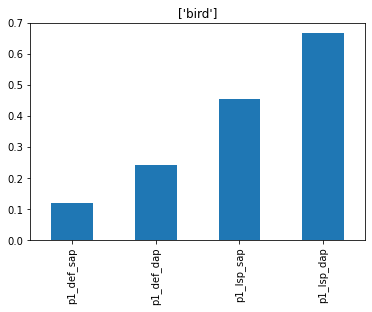

['building'] 80


<AxesSubplot:title={'center':"['building']"}>

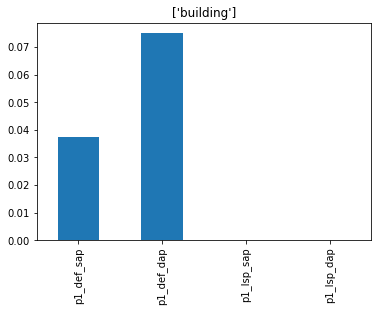

['fish'] 64


<AxesSubplot:title={'center':"['fish']"}>

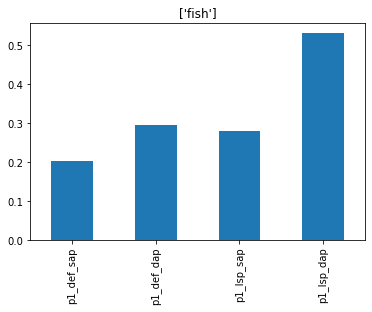

['flower'] 49


<AxesSubplot:title={'center':"['flower']"}>

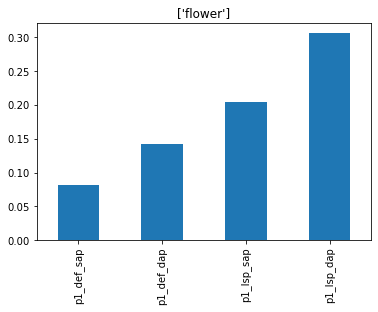

['insect'] 43


<AxesSubplot:title={'center':"['insect']"}>

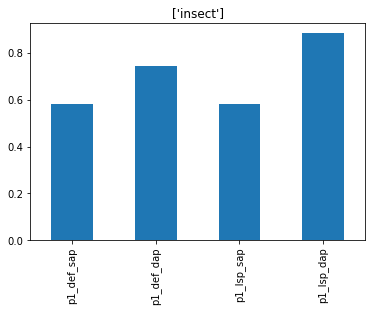

['tool'] 38


<AxesSubplot:title={'center':"['tool']"}>

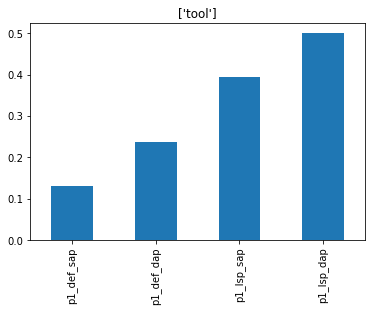

['tree'] 62


<AxesSubplot:title={'center':"['tree']"}>

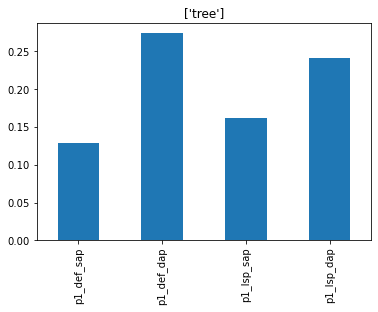

['vegetable'] 3


<AxesSubplot:title={'center':"['vegetable']"}>

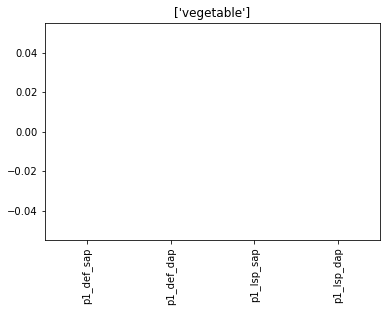

['vehicle'] 105


<AxesSubplot:title={'center':"['vehicle']"}>

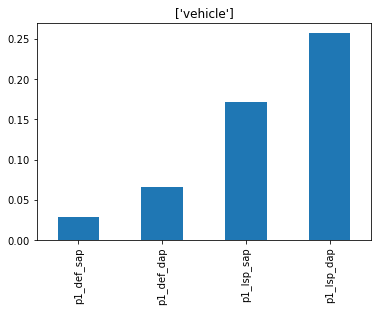

In [14]:
dfs = []
for name, group in dataset_to_df['LMDIAG'].groupby('obj_label'):
# #     display(group)
    print(name, len(group.index))
    display(group[["p1_def_sap", "p1_def_dap", "p1_lsp_sap", "p1_lsp_dap"]].mean().plot(kind='bar', title=name))
#     display()
    plt.show()
#     group['mrr_def_sap', 'mrr', 'p1_lsp_sap', 'p1_lsp_dap']
    

# for col in dataset_to_df['LMDIAG'].columns:
#     print(col)